# Inlet Profiles

Chromatographic systems always require some kind of convective flow through the column. 

In this lesson, we will:
- Create and connect our first systems of unit operations.
- Define inlet profiles using piecewise cubic polynomials.
- Run CADET and analyze the results.

## Example 1: Flow from INLET to OUTLET

In a first example, we will look at a simple system with just two unit operations, an [INLET](https://cadet.github.io/master/modelling/unit_operations/inlet), and an [OUTLET](https://cadet.github.io/master/modelling/unit_operations/outlet).

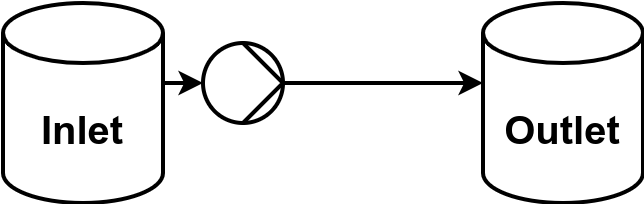

We will introduce flow from the `INLET` to the `OUTLET` with a constant flow rate of $Q = 1~mL \cdot s^{-1}$. 
In the first section, the concentration is $1.0~mM$, and after $1~min$, it is changed to $0.0~mM$.

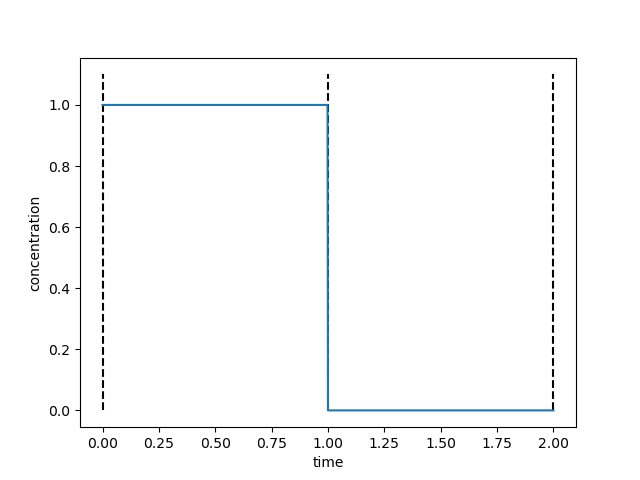

### 1. Setting up the model

Before we start with specifying the system, we define some local auxiliary variables.
Note that we have to convert all units to SI units.

<div class="alert alert-info">

**Note:** 
    
Generally, CADET can be used with any consistent system of units.
However, we strongly recommend converting everything to the SI system.
    
</div>

#### Component System

First, a `ComponentSystem` needs to be created.
The `ComponentSystem` ensures that all parts of the process have the same number of components.
Moreover, components can be named which automatically adds legends to the plot methods.
For advanced use, see [here](https://cadet-process.readthedocs.io/en/latest/reference/process_model/component_system.html).

In this case, it is simple to setup; only the number of components needs to be specified.

Alternatively, pass a list of strings for the component names in the constructor:

#### Unit Operations

Now, the unit operation models are instantiated.
For an overview of all models in CADET-Process, see [here](https://cadet-process.readthedocs.io/en/latest/reference/process_model/unit_operation_models.html).

To instantiate a unit, it requires the component system, as well as a unique name.
Note that the name string passed in the constructor is later used to reference the unit in the flow sheet for setting `Events` and `OptimizationVariables`.

##### Inlet

In CADET, the `Inlet` pseudo unit operation serves as source for the system and is used to create arbitary concentration profiles as boundary conditions (see also [here](https://cadet.github.io/master/modelling/unit_operations/inlet)).

The concentration profile is described using a third degree piecewise polynomial for each component. 
Later, we will define the pieces, when we look at events.
Similarly, the flow rate can be expressed as a third degree piecewise polynomial.
Since the flow rate is constant, we can directly set the parameter on the object.

Note that every unit operation model has different model parameters.
To display all parameters, simply print the `parameters` attribute.

##### Outlet
The `Outlet` is another psuedo unit operation that serves as sink for the system (see also [here](https://cadet.github.io/master/modelling/unit_operations/outlet)).

Note that the `Outlet` unit does not have any model parameters.

#### Setting up FlowSheet

To represent the flow between different unit operations, a `FlowSheet` object is initiated. All units need to be added and then connected accordingly. For more information, see also [here](https://cadet-process.readthedocs.io/en/latest/reference/process_model/flow_sheet.html).

#### Define Dynamic Events in Process

The `Process` class is used to define dynamic changes to of the units and connections.
After instantiation, it is important to also set the overall duration of the process.
Since CADET-Process is also designed for cyclic processes, the corresponding attribute is called `cycle_time`.

The `add_event` method requires the following arguments:
- `name`: Name of the event.
- `parameter_path`: Path of the parameter that is changed in dot notation. E.g. the flow rate of the eluent unit is the parameter `flow_rate` of the `eluent` which of process `flow_sheet`. Hence, the path is `flow_sheet.eluent.flow_rate`. As previously mentioned, the name of the unit operation is used to reference it, not the variable.
- `state`: Value of the attribute that is changed at Event execution.
- `time`: Time at which the event is executed.

To display all section dependent parameters of an object, use the `section_dependent_parameters` attribute.

Note that also flow sheet connectivity can be added as events. More on that later.

## 3. Setting up the simulator and running the simulation

To simulate the process, a process simulator needs to be configured.
If no path is specified, CADET-Process will try to autodetect CADET.

If a specific version of CADET is to be used, add the install path to the constructor:

```
process_simulator = Cadet(install_path='/path/to/cadet/executable')
```

To check that everything works correctly, you can call the check_cadet method:

Now, run the simulation:

## 4. Plotting the results

The simulation_results object contains the solution for the inlet and outlet of every unit operation also provide plot methods.